# Step 1:- Business Problem

**To Predict Where the Person who is suffering from different thyroid then the person is also suffering from cancer or not.**

**The objective of this study was to train machine learning models for predicting the likelihood of recurrence in patients diagnosed with well-differentiated thyroid cancer. While thyroid cancer mortality remains low, the risk of recurrence is a significant concern. Identifying individual patient recurrence risk is crucial for guiding subsequent management and follow-ups.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Thyroid_Diff.csv")
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


# Step 2:- Data Understanding

Age - Age of Patient

Gender - Sex

Smoking - Currently patient is smoking (Yes/No)

Hx Smoking - Patient’s history of smoking (Yes / No)

Hx Radiothreapy - History of receiving radiotherapy treatment (Yes / No)

Thyroid Function - Indicates whether thyroid function is normal (Euthyroid) or abnormal

Physical Examination - 	Notes from physical exam, e.g., presence of nodules or goiter (Single nodular goiter-left/right, 
Multinodular goiter) 

Adenopathy - Presence of swollen lymph nodes (Yes / No)

Pathology - Type of thyroid cancer, e.g., Micropapillary (a subtype of papillary thyroid cancer)

Focality - Describes whether the tumor is Uni-Focal (one tumor) or Multi-Focal (multiple tumors)

Risk - Risk classification (e.g., Low, Intermediate, High) – based on tumor size, spread, etc.

T - Tumor size/extent (e.g., T1a = small tumor ≤1 cm)

N - Lymph Node involvement (N0 = no regional lymph node metastasis)

M - Metastasis (M0 = no distant spread)

Stage - Cancer stage (I, II, etc.), determined from TNM classification

Response - Response to treatment (Excellent, Indeterminate, etc.)

Recurred - Person is recurred from cancer or not

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [4]:
data.shape

(383, 17)

In [5]:
data["Gender"].unique()

array(['F', 'M'], dtype=object)

In [6]:
data["Gender"].value_counts()

F    312
M     71
Name: Gender, dtype: int64

In [7]:
data["Smoking"].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
data["Smoking"].value_counts()

No     334
Yes     49
Name: Smoking, dtype: int64

In [9]:
data["Hx Smoking"].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
data["Hx Smoking"].value_counts()

No     355
Yes     28
Name: Hx Smoking, dtype: int64

In [11]:
data["Hx Radiothreapy"].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
data["Hx Radiothreapy"].value_counts()

No     376
Yes      7
Name: Hx Radiothreapy, dtype: int64

In [13]:
data["Thyroid Function"].unique()

array(['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism',
       'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism'],
      dtype=object)

In [14]:
data["Thyroid Function"].value_counts()

Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: Thyroid Function, dtype: int64

In [15]:
data["Physical Examination"].unique()

array(['Single nodular goiter-left', 'Multinodular goiter',
       'Single nodular goiter-right', 'Normal', 'Diffuse goiter'],
      dtype=object)

In [16]:
data["Physical Examination"].value_counts()

Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: Physical Examination, dtype: int64

In [17]:
data["Adenopathy"].unique()

array(['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior'],
      dtype=object)

In [18]:
data["Adenopathy"].value_counts()

No           277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: Adenopathy, dtype: int64

In [19]:
data["Pathology"].unique()

array(['Micropapillary', 'Papillary', 'Follicular', 'Hurthel cell'],
      dtype=object)

In [20]:
data["Pathology"].value_counts()

Papillary         287
Micropapillary     48
Follicular         28
Hurthel cell       20
Name: Pathology, dtype: int64

In [21]:
data["Focality"].unique()

array(['Uni-Focal', 'Multi-Focal'], dtype=object)

In [22]:
data["Focality"].value_counts()

Uni-Focal      247
Multi-Focal    136
Name: Focality, dtype: int64

In [23]:
data["Risk"].unique()

array(['Low', 'Intermediate', 'High'], dtype=object)

In [24]:
data["Risk"].value_counts()

Low             249
Intermediate    102
High             32
Name: Risk, dtype: int64

In [25]:
data["T"].unique()

array(['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'], dtype=object)

In [26]:
data["T"].value_counts()

T2     151
T3a     96
T1a     49
T1b     43
T4a     20
T3b     16
T4b      8
Name: T, dtype: int64

In [27]:
data["N"].unique()

array(['N0', 'N1b', 'N1a'], dtype=object)

In [28]:
data["N"].value_counts()

N0     268
N1b     93
N1a     22
Name: N, dtype: int64

In [29]:
data["M"].unique()

array(['M0', 'M1'], dtype=object)

In [30]:
data["M"].value_counts()

M0    365
M1     18
Name: M, dtype: int64

In [31]:
data["Stage"].unique()

array(['I', 'II', 'IVB', 'III', 'IVA'], dtype=object)

In [32]:
data["Stage"].value_counts()

I      333
II      32
IVB     11
III      4
IVA      3
Name: Stage, dtype: int64

In [33]:
data["Response"].unique()

array(['Indeterminate', 'Excellent', 'Structural Incomplete',
       'Biochemical Incomplete'], dtype=object)

In [34]:
data["Response"].value_counts()

Excellent                 208
Structural Incomplete      91
Indeterminate              61
Biochemical Incomplete     23
Name: Response, dtype: int64

In [35]:
data["Recurred"].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
data["Recurred"].value_counts()

No     275
Yes    108
Name: Recurred, dtype: int64

In [37]:
data.duplicated().sum()

19

In [38]:
data.drop_duplicates()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


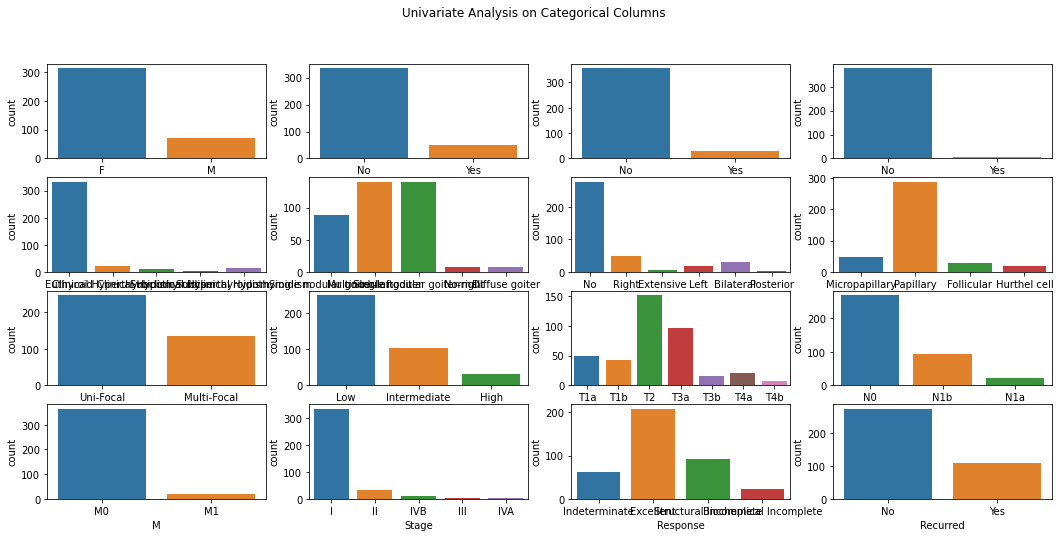

In [39]:
plt.rcParams["figure.figsize"] = (18,8)

plt.subplot(4,4,1)
sns.countplot(data["Gender"])

plt.subplot(4,4,2)
sns.countplot(data["Smoking"])

plt.subplot(4,4,3)
sns.countplot(data["Hx Smoking"])

plt.subplot(4,4,4)
sns.countplot(data["Hx Radiothreapy"])

plt.subplot(4,4,5)
sns.countplot(data["Thyroid Function"])

plt.subplot(4,4,6)
sns.countplot(data["Physical Examination"])

plt.subplot(4,4,7)
sns.countplot(data["Adenopathy"])

plt.subplot(4,4,8)
sns.countplot(data["Pathology"])

plt.subplot(4,4,9)
sns.countplot(data["Focality"])

plt.subplot(4,4,10)
sns.countplot(data["Risk"])

plt.subplot(4,4,11)
sns.countplot(data["T"])

plt.subplot(4,4,12)
sns.countplot(data["N"])

plt.subplot(4,4,13)
sns.countplot(data["M"])

plt.subplot(4,4,14)
sns.countplot(data["Stage"])

plt.subplot(4,4,15)
sns.countplot(data["Response"])

plt.subplot(4,4,16)
sns.countplot(data["Recurred"])

plt.suptitle("Univariate Analysis on Categorical Columns")
plt.show()

In [40]:
data.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

**Encoding**

In [54]:
data["Gender"] = data["Gender"].replace({"M":1,"F":0})
data["Smoking"] = data["Smoking"].replace({"No":0,"Yes":1})
data["Hx Smoking"] = data["Hx Smoking"].replace({"No":0,"Yes":1})
data["Hx Radiothreapy"] = data["Hx Radiothreapy"].replace({"No":0,"Yes":1})
data["Thyroid Function"] = data["Thyroid Function"].replace({"Euthyroid":0,"Clinical Hyperthyroidism":1,"Subclinical Hypothyroidism":2,"Clinical Hypothyroidism":3,"Subclinical Hyperthyroidism":4})
data["Physical Examination"] = data["Physical Examination"].replace({"Multinodular goiter":0,"Single nodular goiter-right":1,"Single nodular goiter-left":2,"Normal":3,"Diffuse goiter":4})
data["Adenopathy"] = data["Adenopathy"].replace({"No":0,"Right":1,"Bilateral":2,"Left":3,"Extensive":4,"Posterior":5})
data["Pathology"] = data["Pathology"].replace({"Papillary":0,"Micropapillary":1,"Follicular":2,"Hurthel cell":3})
data["Focality"] = data["Focality"].replace({"Uni-Focal":0,"Multi-Focal":1})
data["Risk"] = data["Risk"].replace({"Low":0,"Intermediate":1,"High":2})
data["T"] = data["T"].replace({"T2":0,"T3a":1,"T1a":2,"T1b":3,"T4a":4,"T3b":5,"T4b":6})
data["N"] = data["N"].replace({"N0":0,"N1b":1,"N1a":2})
data["M"] = data["M"].replace({"M0":0,"M1":1})
data["Stage"] = data["Stage"].replace({"I":0,"II":1,"IVB":2,"III":3,"IVA":4})
data["Response"] = data["Response"].replace({"Excellent":0,"Structural Incomplete":1,"Indeterminate":2,"Biochemical Incomplete":3})
data["Recurred"] = data["Recurred"].replace({"No":0,"Yes":1,})

In [55]:
X = data.drop("Recurred",axis=1)
y = data["Recurred"]

In [56]:
X

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,0,0,0,0,0,2,0,1,0,0,2,0,0,0,2
1,34,0,0,1,0,0,0,0,1,0,0,2,0,0,0,0
2,30,0,0,0,0,0,1,0,1,0,0,2,0,0,0,0
3,62,0,0,0,0,0,1,0,1,0,0,2,0,0,0,0
4,62,0,0,0,0,0,0,0,1,1,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,0,1,1,0,0,2,6,1,1,2,3
379,81,1,1,0,1,0,0,4,0,1,2,6,1,1,2,1
380,72,1,1,1,0,0,0,2,0,1,2,6,1,1,2,1
381,61,1,1,1,1,1,0,4,3,1,2,6,1,0,4,1


# Train Test Split

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 7)

In [58]:
X_train

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
371,51,0,0,0,0,0,0,0,0,1,2,4,2,1,1,1
89,31,1,1,0,0,0,0,1,0,1,1,3,1,0,0,1
120,37,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
332,31,0,0,0,0,0,2,0,2,0,1,1,2,0,0,3
184,67,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,36,0,0,0,0,0,1,1,0,0,1,0,1,0,0,2
67,51,0,0,0,0,0,2,0,0,0,0,3,0,0,0,0
25,33,0,0,0,0,0,1,0,1,0,0,2,0,0,0,0
196,22,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# Modelling & Evaluation

## Logistic Regression

In [60]:
# Modelling 
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

#Predict & Evaluate on train data
ypred_train = log_model.predict(X_train)        #default thresold value is 0.5
print("Train Accuracy :",accuracy_score(y_train,ypred_train))

#Cross Validation on Train data
print("CV Score :",cross_val_score(log_model,X_train,y_train,cv=5,scoring="accuracy").mean())

#Predict & Evaluation on test data
ypred_test = log_model.predict(X_test)
print("Test Accuracy :", accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8986928104575164
CV Score : 0.8855631940772077
Test Accuracy : 0.922077922077922


In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[49  4]
 [ 2 22]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        53
           1       0.85      0.92      0.88        24

    accuracy                           0.92        77
   macro avg       0.90      0.92      0.91        77
weighted avg       0.93      0.92      0.92        77



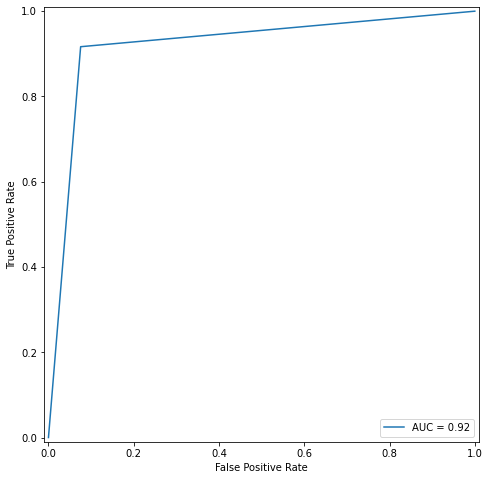

In [62]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

In [63]:
# AUC Score
from sklearn.metrics import roc_auc_score
print("AUC Score:",roc_auc_score(y_test,ypred_test))

AUC Score: 0.9205974842767295


# 2. KNN
**HPT**
**Modelling & Evaluation**

In [65]:
# Hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {"n_neighbors":list(range(1,50)),"p":[1,2]}
knn_grid = GridSearchCV(estimator, param_grid, scoring="accuracy",cv=5)
knn_grid.fit(X_train,y_train)

#KNN with best Hyperparameters
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=3, p=1)

In [66]:
#Modeeling
knn_model = knn_grid.best_estimator_
knn_model.fit(X_train,y_train)

#Predict & Evaluate on train data
ypred_train = knn_model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train,ypred_train))

#Cross Validation on Train Data
print("CV Score :", cross_val_score(knn_model,X_train,y_train,cv=5,scoring="accuracy").mean())

#Predict & Evaluate on test data
ypred_test = knn_model.predict(X_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.9313725490196079
CV Score : 0.8790586991010049
Test Accuracy: 0.9090909090909091


In [67]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[50  3]
 [ 4 20]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        53
           1       0.87      0.83      0.85        24

    accuracy                           0.91        77
   macro avg       0.90      0.89      0.89        77
weighted avg       0.91      0.91      0.91        77



# 3. Support Vector Machine(SVM)
**HPT**

**Modelling & Evaluation**

In [68]:
#Hyperparameter Tuning
from sklearn.svm import SVC
estimator = SVC()
param_grid = {"C":[0.01,0.1,1],"kernel":["linear","rbf",'sigmoid','poly']}
svm_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
svm_grid.fit(X_train,y_train)

#SVM with Best Hyperparameters
svm_grid.best_estimator_

SVC(C=0.01, kernel='linear')

In [69]:
# Modelling
svm_model = svm_grid.best_estimator_
svm_model.fit(X_train,y_train)

#Predict & Evaluate on train data
ypred_train = svm_model.predict(X_train)
print("Train Accuracy :",accuracy_score(y_train,ypred_train))

#Cross Validation on Train Data
print("CV Score :",cross_val_score(svm_model,X_train,y_train,cv=5,scoring='accuracy').mean())

# Predict & Evaluate on test data
ypred_test = svm_model.predict(X_test)
print("Test Accuracy :",accuracy_score(y_test, ypred_test))

Train Accuracy : 0.8954248366013072
CV Score : 0.8789529349550502
Test Accuracy : 0.8961038961038961


# 4. Decision Tree Classifier
**HPT**
* Identify important features by using feature selection(ensembles method)

**Modelling & Evaluation**
* first create default DT model(fully grown tree without any pruning) so that, we can understand the max_depth

In [70]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state =True)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=True)

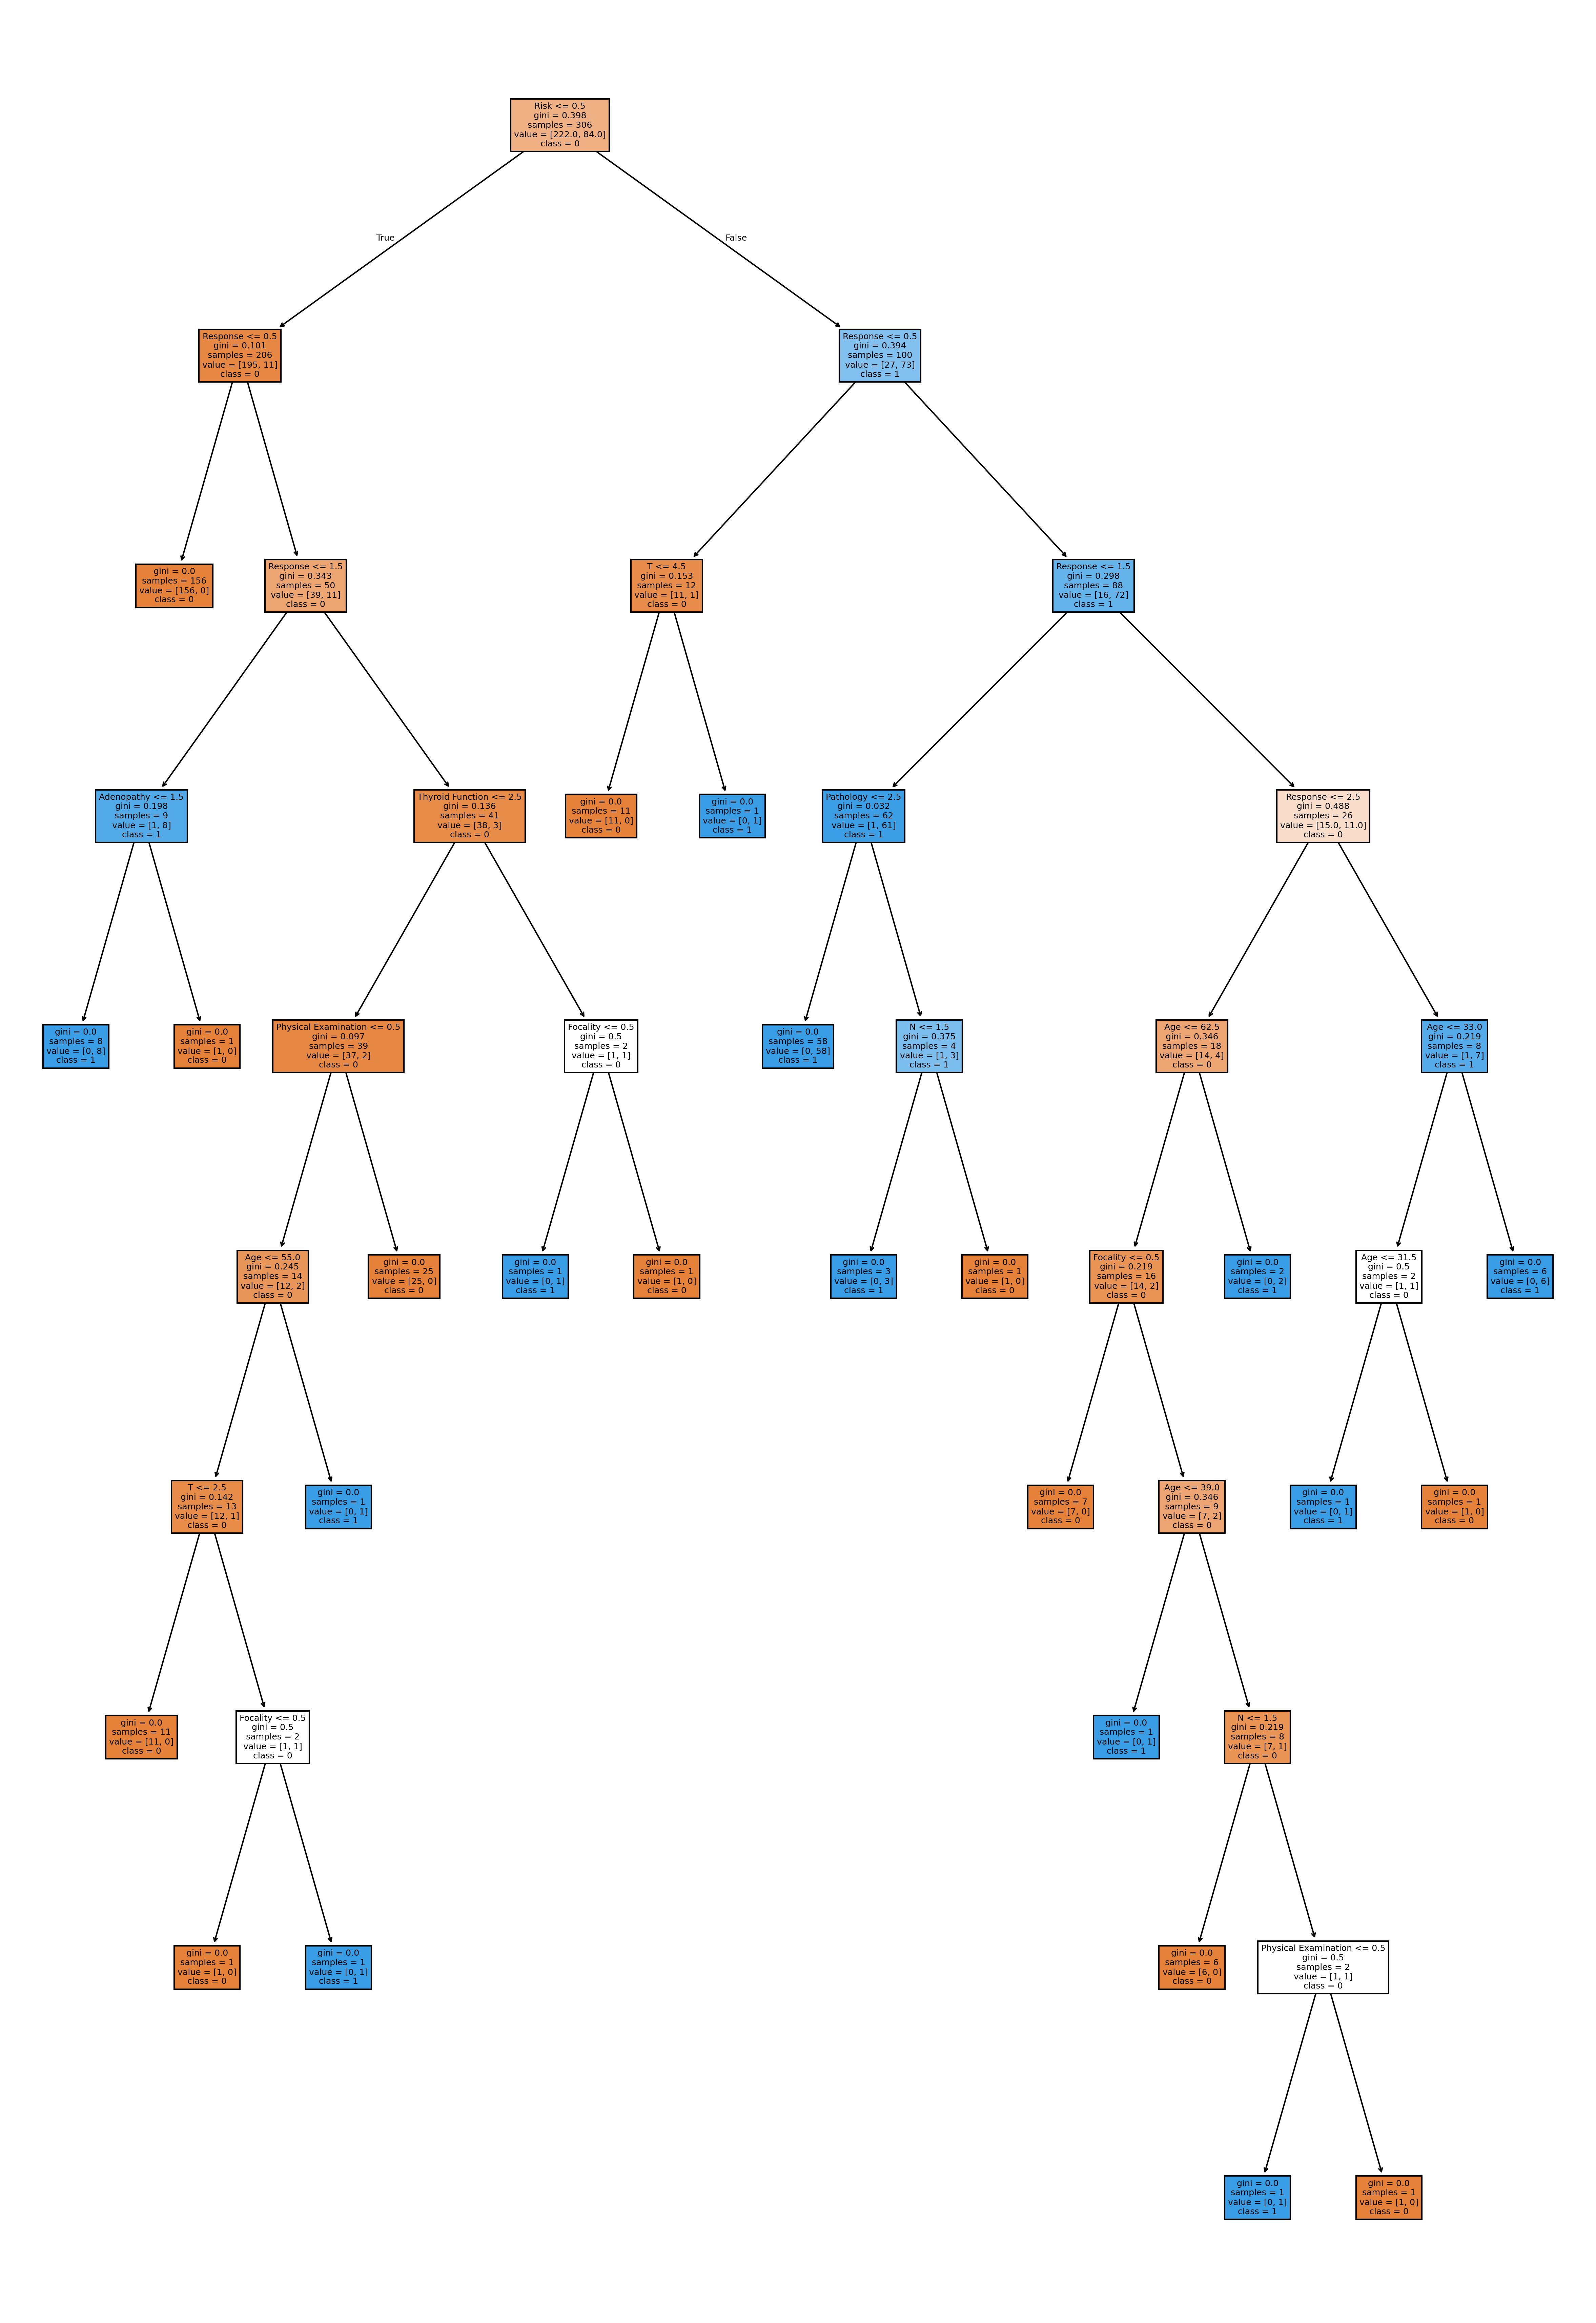

In [71]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,30),dpi=300)
plot_tree(model,filled=True,
          feature_names=X_train.columns.tolist(),
          class_names=["0","1"])
plt.show()

In [72]:
# Hyperparameter Tuning 
estimator = DecisionTreeClassifier(random_state=True)

param_grid = {"criterion":["gini",'entropy'],"max_depth":list(range(1,9))}

dt_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)

dt= dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=4, random_state=True)

In [74]:
# Important features
feats_dt = pd.DataFrame(data=dt.feature_importances_,
                        index=X.columns,
                        columns=["Importance"])

important_features_dt = feats_dt[feats_dt["Importance"]>0].index.tolist()
important_features_dt

['Thyroid Function', 'Adenopathy', 'Pathology', 'Risk', 'T', 'Response']

**Creating Decision Tree Model with important parameters and important features**

In [75]:
#Searching train & Test Data
X_train_dt = X_train[important_features_dt]
X_test_dt = X_test[important_features_dt]

#Modelling
dt = dt_grid.best_estimator_
dt.fit(X_train_dt,y_train)

#Evaluation
ypred_train = dt.predict(X_train_dt)
ypred_test =dt.predict(X_test_dt)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(dt,X_train_dt,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9705882352941176
CV Score : 0.9542570068746695
Test Accuracy : 0.974025974025974


In [76]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[53  0]
 [ 2 22]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       1.00      0.92      0.96        24

    accuracy                           0.97        77
   macro avg       0.98      0.96      0.97        77
weighted avg       0.97      0.97      0.97        77



# 5. Random Forest Classifier
* HPT
* Identify important features
* Modelling
* Evaluation

In [77]:
# Hyperparameter tuning

from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state =True)

param_grid = {"n_estimators":list(range(1,51))}

rf_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(X_train,y_train)

rf=rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=36, random_state=True)

In [78]:
# Important Features
feats_rf = pd.DataFrame(data=rf.feature_importances_,
                       index=X.columns,
                       columns=["Importance"])

important_features_rf = feats_rf[feats_rf["Importance"]>0].index.tolist()
important_features_rf

['Age',
 'Gender',
 'Smoking',
 'Hx Smoking',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

In [79]:
X_train_rf = X_train[important_features_rf]
X_test_rf = X_test[important_features_rf]

# Modelling
rf = rf_grid.best_estimator_
rf.fit(X_train_rf,y_train)

# Evaluation
ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)

print("Train Accuracy :", accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(rf,X_train_rf,y_train,cv=5,scoring = 'accuracy').mean())
print("Test Accuracy :", accuracy_score(y_test,ypred_test))

Train Accuracy : 1.0
CV Score : 0.9281332628239027
Test Accuracy : 0.961038961038961


In [80]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[51  2]
 [ 1 23]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.92      0.96      0.94        24

    accuracy                           0.96        77
   macro avg       0.95      0.96      0.96        77
weighted avg       0.96      0.96      0.96        77



# 6.AdaBoost Classifier

In [81]:
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier(random_state =True)

param_grid = {"n_estimators":list(range(1,51))}

ab_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ab_grid.fit(X_train,y_train)

ab=ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=14, random_state=True)

In [82]:
# Important Features
feats_ab = pd.DataFrame(data=ab.feature_importances_,
                       index=X.columns,
                       columns=["Importance"])

important_features_ab = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_ab

['Age', 'Pathology', 'Risk', 'T', 'Response']

In [83]:
X_train_ab = X_train[important_features_ab]
X_test_ab = X_test[important_features_ab]

# Modelling
ab = ab_grid.best_estimator_
ab.fit(X_train_ab,y_train)

# Evaluation
ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

print("Train Accuracy :", accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(ab,X_train_ab,y_train,cv=5,scoring = 'accuracy').mean())
print("Test Accuracy :", accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9607843137254902
CV Score : 0.9476996298254893
Test Accuracy : 0.961038961038961


In [84]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[50  3]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.89      1.00      0.94        24

    accuracy                           0.96        77
   macro avg       0.94      0.97      0.96        77
weighted avg       0.97      0.96      0.96        77



# 7. Gradient Boost Classifier

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(random_state =True)

param_grid = {"n_estimators":list(range(1,51)),
             "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9,1]}

gb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(X_train,y_train)

gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(n_estimators=15, random_state=True)

In [86]:
# Important Features
feats_gb = pd.DataFrame(data=gb.feature_importances_,
                       index=X.columns,
                       columns=["Importance"])

important_features_gb = feats_gb[feats_gb["Importance"]>0].index.tolist()
important_features_gb

['Age', 'Thyroid Function', 'Adenopathy', 'Pathology', 'Risk', 'T', 'Response']

In [87]:
X_train_gb = X_train[important_features_gb]
X_test_gb = X_test[important_features_gb]

# Modelling
gb = gb_grid.best_estimator_
gb.fit(X_train_gb,y_train)

# Evaluation
ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

print("Train Accuracy :", accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(gb,X_train_gb,y_train,cv=5,scoring = 'accuracy').mean())
print("Test Accuracy :", accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9673202614379085
CV Score : 0.9575356953992596
Test Accuracy : 0.961038961038961


In [88]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[53  0]
 [ 3 21]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        53
           1       1.00      0.88      0.93        24

    accuracy                           0.96        77
   macro avg       0.97      0.94      0.95        77
weighted avg       0.96      0.96      0.96        77



# 8. XGBoost Classifier

In [89]:
# Hyperparameter tuning
from xgboost import XGBClassifier
estimator= XGBClassifier()

param_grid = {"n_estimators":[10,20,40,100],
              'max_depth':[3,4,5],
             "gamma":[0,0.15,0.3,0.5,1]}

xgb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
xgb_grid.fit(X_train,y_train)

xgb = xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [90]:
# Important Features
feats_xgb = pd.DataFrame(data= xgb.feature_importances_,
                       index=X.columns,
                       columns=["Importance"])

important_features_xgb = feats_xgb[feats_xgb["Importance"]>0].index.tolist()
important_features_xgb

['Age',
 'Gender',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Risk',
 'T',
 'N',
 'Response']

In [91]:
X_train_xgb = X_train[important_features_xgb]
X_test_xgb = X_test[important_features_xgb]

# Modelling
xgb = xgb_grid.best_estimator_
xgb.fit(X_train_xgb,y_train)

# Evaluation
ypred_train = xgb.predict(X_train_xgb)
ypred_test = xgb.predict(X_test_xgb)

print("Train Accuracy :", accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring = 'accuracy').mean())
print("Test Accuracy :", accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9836601307189542
CV Score : 0.96409307244844
Test Accuracy : 0.987012987012987


In [92]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[53  0]
 [ 1 23]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.96      0.98        24

    accuracy                           0.99        77
   macro avg       0.99      0.98      0.98        77
weighted avg       0.99      0.99      0.99        77



# Save the Best Model

In [93]:
from joblib import dump

dump(ab,'Thyroid Cancer.joblib')

['Thyroid Cancer.joblib']

# Predict on New data

In [94]:
input = {'Age': 45,
 'Gender': 'F',
 'Smoking':'No',
 'Hx Smoking':'No',
 'Hx Radiothreapy':'No',
 'Thyroid Function':'Euthyroid',
 'Physical Examination':'Multinodular goiter',
 'Adenopathy':'Right',
 'Pathology':'Papillary',
 'Focality':'Uni-focal',
 'Risk':'Low',
 'T':'T4b',
 'N':'N1b',
 'M':'M0',
 'Stage':'IVB',
 'Response':'Excellent'}

In [96]:
data = pd.DataFrame(input,index=[0])
data

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,45,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Uni-focal,Low,T4b,N1b,M0,IVB,Excellent


# Apply data Preprocessing on Unknown Data

In [97]:
data["Gender"] = data["Gender"].replace({"M":1,"F":0})
data["Smoking"] = data["Smoking"].replace({"No":0,"Yes":1})
data["Hx Smoking"] = data["Hx Smoking"].replace({"No":0,"Yes":1})
data["Hx Radiothreapy"] = data["Hx Radiothreapy"].replace({"No":0,"Yes":1})
data["Thyroid Function"] = data["Thyroid Function"].replace({"Euthyroid":0,"Clinical Hyperthyroidism":1,"Subclinical Hypothyroidism":2,"Clinical Hypothyroidism":3,"Subclinical Hyperthyroidism":4})
data["Physical Examination"] = data["Physical Examination"].replace({"Multinodular goiter":0,"Single nodular goiter-right":1,"Single nodular goiter-left":2,"Normal":3,"Diffuse goiter":4})
data["Adenopathy"] = data["Adenopathy"].replace({"No":0,"Right":1,"Bilateral":2,"Left":3,"Extensive":4,"Posterior":5})
data["Pathology"] = data["Pathology"].replace({"Papillary":0,"Micropapillary":1,"Follicular":2,"Hurthel cell":3})
data["Focality"] = data["Focality"].replace({"Uni-Focal":0,"Multi-Focal":1})
data["Risk"] = data["Risk"].replace({"Low":0,"Intermediate":1,"High":2})
data["T"] = data["T"].replace({"T2":0,"T3a":1,"T1a":2,"T1b":3,"T4a":4,"T3b":5,"T4b":6})
data["N"] = data["N"].replace({"N0":0,"N1b":1,"N1a":2})
data["M"] = data["M"].replace({"M0":0,"M1":1})
data["Stage"] = data["Stage"].replace({"I":0,"II":1,"IVB":2,"III":3,"IVA":4})
data["Response"] = data["Response"].replace({"Excellent":0,"Structural Incomplete":1,"Indeterminate":2,"Biochemical Incomplete":3})

X_new = data

In [99]:
# Select Important Features of your best model
X_new = X_new[important_features_ab]

# Encode categorical features (if any)
from sklearn.preprocessing import LabelEncoder

for col in X_new.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_new[col] = le.fit_transform(X_new[col])

# Apply & Predict using your best model
ab.predict(X_new)

array([0], dtype=int64)